In [30]:
import os
import cv2
import random
import matplotlib.pyplot as plt

In [4]:
ROOT_DIR = os.path.dirname(os.getcwd())
DATA_FOLDER = os.path.join(ROOT_DIR, "data")

In [5]:
video_L_path = os.path.join(DATA_FOLDER, "keparoicam_clipL_synchronized.mp4")
video_R_path = os.path.join(DATA_FOLDER, "keparoicam_clipR_synchronized.mp4")

In [6]:
video_left_capture = cv2.VideoCapture(video_L_path)
video_right_capture = cv2.VideoCapture(video_R_path)

In [34]:
def sample_frames_from_video(capture, n_frames=1, frame_ids=None):
    max_frame = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []
    
    if frame_ids is None:
        frame_ids = [id for id in random.sample(range(0, max_frame), n_frames)]
    
    for frame_id in frame_ids:
        capture.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
        ret, frame = capture.read()
        if ret is True:
            frames.append(frame)
        else:
            print(f"Reading frame {frame_id} failed, ret: {ret}")
            
    return frames

In [37]:
left_frames = sample_frames_from_video(video_left_capture, frame_ids=[1000])
right_frames = sample_frames_from_video(video_right_capture, frame_ids=[1000])

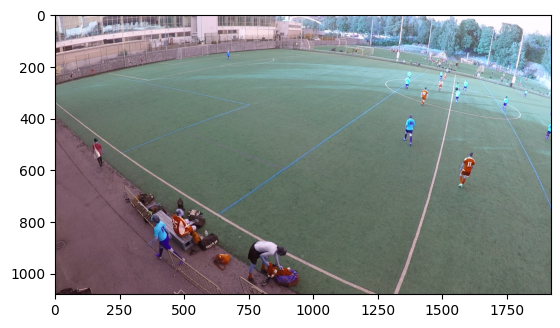

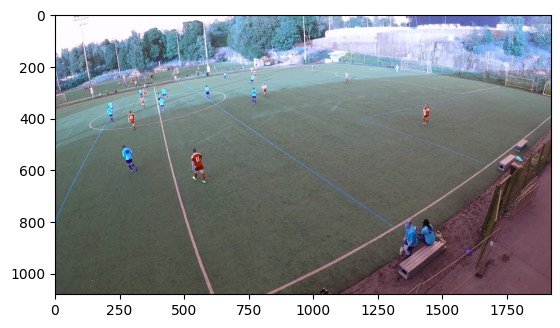

In [38]:
plt.imshow(left_frames[0])
plt.show()
plt.imshow(right_frames[0])
plt.show()

In [39]:
left_frame_path = os.path.join(DATA_FOLDER, "keparoi_left_frame.jpg")
cv2.imwrite(left_frame_path, left_frames[0])
right_frame_path = os.path.join(DATA_FOLDER, "keparoi_right_frame.jpg")
cv2.imwrite(right_frame_path, right_frames[0])

True